# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv', index_col=0) #index_col >> first column will be id
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic Data Exploration
> Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.





In [2]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.shape

(148654, 12)

there are `148654` rows and `13` columns in our dataset.

In [4]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

All columns are float, except id is integer and EmployeeName, JobTtle and Agency are object.

In [6]:
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

There are columns will delete completely

## Descriptive Statistics
> Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [7]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
df['TotalPay'].median()

71426.60999999999

In [9]:
df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

In [10]:
df['TotalPay'][df['TotalPay'] < 0]

Id
148654   -618.13
Name: TotalPay, dtype: float64

mean= 74768.321972 <br>
median= 71426.60999999999 <br>
mode= 0.0 <br>
minmum= -618.130000, I deal with it in the next section<br>
maximum= 567595.430000 <br>
std= 50517.005274 <br>
range of  salaries >> until now from 0 to 567595.430000 (maybe there are voluntary jobs).

## Data Cleaning
> Handle missing data by suitable method with explain why you use it.

In [11]:
df.shape[0]

148654

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.shape[0]

148651

There are `3` duplicated records.

In [14]:
df['Agency'].unique()

array(['San Francisco'], dtype=object)

In [15]:
del df['Status']
del df['Notes']
del df['EmployeeName']
del df['Agency']

There are 148654 row in our data, and we have 148654 missing vlaues in status and notes columns, too (which means that we don't have any data in these two columns).

I deleted the first and last columns because it don't affect in our data.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.448841,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148651.0,74769.830909,50516.398338,-618.13,36169.340,71427.22,105841.940,567595.43
TotalPayBenefits,148651.0,93694.445667,62792.756431,-618.13,44071.405,92406.01,132877.495,567595.43
Year,148651.0,2012.522613,1.117529,2011.00,2012.000,2013.00,2014.000,2014.00


In [17]:
def make_abs(data_frame):
    data_cols= list(data_frame.columns)
    for col in data_cols:
        if data_frame[col].dtype == 'float64':
            data_frame[col] =  data_frame[col].apply(abs)

In [18]:
make_abs(df)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.461826,42764.615356,0.0,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059887,11454.380559,0.0,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.872016,8056.554438,0.0,0.000,811.34,4236.575,400184.25
Benefits,112491.0,25007.894193,15402.214166,0.0,11535.395,28628.62,35566.855,96570.66
TotalPay,148651.0,74769.839225,50516.386028,0.0,36169.340,71427.22,105841.940,567595.43
TotalPayBenefits,148651.0,93694.454586,62792.743121,0.0,44071.405,92406.01,132877.495,567595.43
Year,148651.0,2012.522613,1.117529,2011.0,2012.000,2013.00,2014.000,2014.00


Now, I convert all negative values to positive values.

In [20]:
df[np.logical_and(df.OvertimePay.isna(), df.OtherPay.isna())]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
148647,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014


In [21]:
not_provided= df[ df['JobTitle'] == 'Not provided']
not_provided

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
148647,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014


In [22]:
df.drop(list(not_provided.index), inplace= True)

every `Not provided` records are null values, so I deleted them competely.

In [23]:
df.isna().sum()

JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

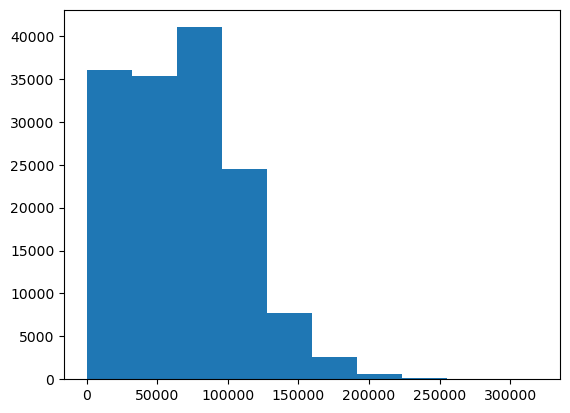

In [24]:
plt.hist(df['BasePay'])
plt.show()

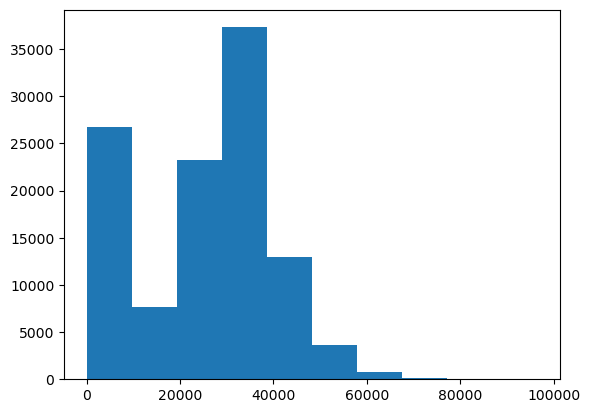

In [25]:
plt.hist(df['Benefits'])
plt.show()

The data is right skewed and full of null values and zeros and has outliers. the best method is median.

In [26]:
jobs_uni= df['JobTitle'].unique()
jobs_uni

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [27]:
years_uni= df['Year'].unique()
years_uni

array([2011, 2012, 2013, 2014], dtype=int64)

In [28]:
def get_median_df(col): #change null values with median of the same positions and experience
    for job in jobs_uni:
        for year in years_uni:
            sub_df = df[np.logical_and(df['JobTitle'] == job, df['Year']== year)]
            if sub_df[col].isna().sum() != sub_df.shape[0]:
                sub_median= round(sub_df[col].median(), 2)
                sub_df = sub_df[sub_df[col].isna()] 
                for i in sub_df.index:
                    df.loc[i, col] = sub_median

> This function takes several minutes to execute

In [29]:
get_median_df('BasePay')

In [30]:
df.isna().sum()

JobTitle                0
BasePay                44
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [31]:
get_median_df('Benefits')

In [32]:
df.isna().sum()

JobTitle                0
BasePay                44
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

I used the mean function becasue employees of same position and have same experience usually have same salary detials. <br>
I noticed that some records groups with same positions and experience `have not any values`.

In [33]:
def get_median_df_job(col):  #change null values with median of the same positions "only"
    for job in jobs_uni:
        for year in years_uni:
            sub_df = df[df['JobTitle'] == job]
            if sub_df[col].isna().sum() != sub_df.shape[0]:
                sub_median= round(sub_df[col].median(), 2)
                sub_df = sub_df[sub_df[col].isna()] 
                for i in sub_df.index:
                    df.loc[i, col] = sub_median

> This function takes several minutes to execute

In [34]:
get_median_df_job('BasePay')

In [35]:
get_median_df_job('Benefits')

In [36]:
df.isna().sum()

JobTitle                0
BasePay                 4
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

I used the concept here and I also noticed that some records groups with same positions `fully have null values`.

In [37]:
df['Benefits'].describe()

count    112491.000000
mean      25007.894193
std       15402.214166
min           0.000000
25%       11535.395000
50%       28628.620000
75%       35566.855000
max       96570.660000
Name: Benefits, dtype: float64

In [38]:
df[df['Benefits'].isna()].shape[0] / df.shape[0] *100

24.32492431886983

We can't drop the null values in Benefits columns because it's almost a `quarter` of the data, Now best form here is to use a method. 

In [39]:
df.fillna({'Benefits': round(df['Benefits'].median(), 2)}, inplace=True)

In [40]:
df.isna().sum()

JobTitle            0
BasePay             4
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

Now, we can delete the remaining null values it's `only 4 rows`, and it'll not affect on our data.

In [41]:
df.dropna(inplace=True)

In [42]:
df.isna().sum().sum()

0

## Basic Data Visualization
> Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [43]:
salary = df.pop('TotalPay')
df.insert(len(df.columns),"Salary" ,salary)
df.head(2)

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
Id,,,,,,,,
1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,2011,567595.43
2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,2011,538909.28


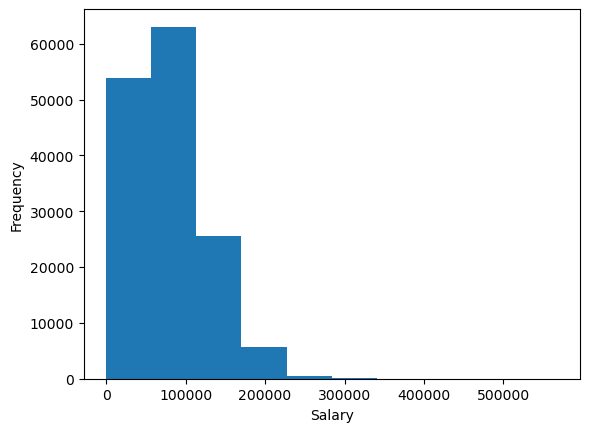

In [44]:
plt.hist(df['Salary'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [45]:
df[df['Salary'] > 250000].shape[0]/ df['Salary'].shape[0] *100 

0.19576712457785608

Salary range is between 0 to 250000. There are `outliers` in range between 250000 and 567595.43, it's `0.2%` of the data.

In [46]:
job_freq= df['JobTitle'].value_counts()
job_freq

Transit Operator                         7036
Special Nurse                            4389
Registered Nurse                         3736
Public Svc Aide-Public Works             2518
Police Officer 3                         2421
                                         ... 
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
BUILDING SERVICES TECHNICIAN                1
TRIAL DELAY REDUCTION COORDINATOR           1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
Cashier 3                                   1
Name: JobTitle, Length: 2154, dtype: int64

>There are 2154 jobs so it'll be uncleared to show them all in pie chart.

In [47]:
explope_df = tuple(np.zeros(5) + 0.1)
explope_df 

(0.1, 0.1, 0.1, 0.1, 0.1)

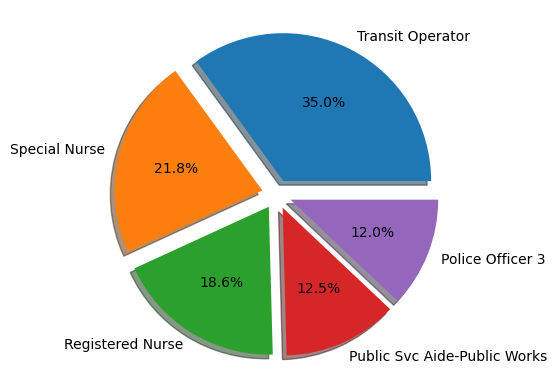

In [48]:
plt.pie(job_freq[:5], labels= job_freq.index[:5], autopct='%1.1f%%', explode= explope_df, shadow=True)
plt.show()

Most five jobs in our data are: 

In [49]:
job_freq.index[:5]

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Police Officer 3'],
      dtype='object')

In [50]:
other_job= pd.Series({'Top five jobs': job_freq[:10].sum() ,'Other':job_freq[11:].sum()})

In [51]:
other_job

Top five jobs     31181
Other            115532
dtype: int64

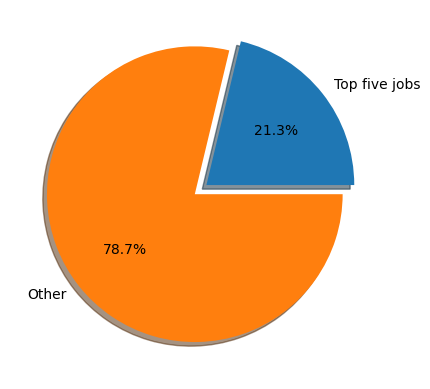

In [52]:
plt.pie(other_job, labels= other_job.index, autopct='%1.1f%%', shadow=True, explode= (0.1, 0))
plt.show()

>Other jobs is 78.7% of the data

## Grouped Analysis
> Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [53]:
df.groupby(['JobTitle']).mean()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
JobTitle,,,,,,,
ACCOUNT CLERK,43300.806506,373.200843,361.656988,28628.6200,44035.664337,2011.00,44035.664337
ACCOUNTANT,46643.172000,0.000000,786.096000,28628.6200,47429.268000,2011.00,47429.268000
ACCOUNTANT INTERN,28732.663958,24.430625,274.648333,28628.6200,29031.742917,2011.00,29031.742917
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,0.000000,0.000000,17975.5900,80266.370000,2014.00,62290.780000
ACUPUNCTURIST,66374.400000,0.000000,1220.000000,28628.6200,67594.400000,2011.00,67594.400000
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,47664.773077,3571.223462,1469.883846,28628.6200,52705.880385,2011.00,52705.880385
X-Ray Laboratory Aide,46086.387100,3483.767100,1253.788500,18697.1805,69521.123200,2013.04,50823.942700
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000,0.000000,1022.960000,28628.6200,53632.870000,2011.00,53632.870000


In [54]:
df.groupby(['JobTitle']).median()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
JobTitle,,,,,,,
ACCOUNT CLERK,49777.780,0.000,0.000,28628.62,49777.820,2011.0,49777.820
ACCOUNTANT,60076.240,0.000,0.000,28628.62,60076.240,2011.0,60076.240
ACCOUNTANT INTERN,16806.755,0.000,0.000,28628.62,17658.505,2011.0,17658.505
"ACPO,JuvP, Juv Prob (SFERS)",62290.780,0.000,0.000,17975.59,80266.370,2014.0,62290.780
ACUPUNCTURIST,66374.400,0.000,1220.000,28628.62,67594.400,2011.0,67594.400
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,54066.080,2471.100,833.150,28628.62,60333.125,2011.0,60333.125
X-Ray Laboratory Aide,55251.635,941.215,801.895,26107.20,85551.190,2013.0,60047.290
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910,0.000,1022.960,28628.62,53632.870,2011.0,53632.870


In [55]:
df.groupby(['JobTitle']).std()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
JobTitle,,,,,,,
ACCOUNT CLERK,12890.631740,1400.408714,576.172993,0.000000,13170.742908,0.000000,13170.742908
ACCOUNTANT,27703.019579,0.000000,1221.582691,0.000000,27137.331315,0.000000,27137.331315
ACCOUNTANT INTERN,20635.668379,118.671160,788.004565,0.000000,20711.322649,0.000000,20711.322649
"ACPO,JuvP, Juv Prob (SFERS)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUPUNCTURIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,17300.039056,4858.619801,1594.230668,0.000000,19760.943417,0.000000,19760.943417
X-Ray Laboratory Aide,20467.891506,6458.223654,1618.323419,12122.842263,35747.544961,0.815506,24170.083004
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.groupby(['JobTitle']).min()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
JobTitle,,,,,,,
ACCOUNT CLERK,614.00,0.0,0.00,28628.62,614.00,2011,614.00
ACCOUNTANT,0.00,0.0,0.00,28628.62,1148.40,2011,1148.40
ACCOUNTANT INTERN,2981.53,0.0,0.00,28628.62,2981.53,2011,2981.53
"ACPO,JuvP, Juv Prob (SFERS)",62290.78,0.0,0.00,17975.59,80266.37,2014,62290.78
ACUPUNCTURIST,66374.40,0.0,1220.00,28628.62,67594.40,2011,67594.40
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,4690.68,0.0,200.00,28628.62,5343.69,2011,5343.69
X-Ray Laboratory Aide,1007.00,0.0,0.00,10.07,1017.07,2012,1007.00
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.91,0.0,1022.96,28628.62,53632.87,2011,53632.87


In [57]:
df.groupby(['JobTitle']).max()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
JobTitle,,,,,,,
ACCOUNT CLERK,60838.20,10753.06,3370.13,28628.62,60838.20,2011,60838.20
ACCOUNTANT,65392.01,0.00,2782.08,28628.62,65392.01,2011,65392.01
ACCOUNTANT INTERN,58501.72,624.84,3069.19,28628.62,58799.53,2011,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",62290.78,0.00,0.00,17975.59,80266.37,2014,62290.78
ACUPUNCTURIST,66374.40,0.00,1220.00,28628.62,67594.40,2011,67594.40
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,60086.62,23016.22,5643.93,28628.62,85077.40,2011,85077.40
X-Ray Laboratory Aide,66123.01,29239.96,7916.20,32234.86,129044.16,2014,99812.97
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.91,0.00,1022.96,28628.62,53632.87,2011,53632.87


The values are often close to each other

## Simple Correlation Analysis
> Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [58]:
corr_df= df.corr()
corr_df

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Salary
BasePay,1.000000,0.266133,0.285761,0.795382,0.941531,0.033643,0.949178
OvertimePay,0.266133,1.000000,0.316613,0.263693,0.467978,0.027892,0.504857
OtherPay,0.285761,0.316613,1.000000,0.202072,0.422392,-0.002500,0.470546
Benefits,0.795382,0.263693,0.202072,1.000000,0.814622,-0.116164,0.773582
TotalPayBenefits,0.941531,0.467978,0.422392,0.814622,1.000000,0.152027,0.977311
Year,0.033643,0.027892,-0.002500,-0.116164,0.152027,1.000000,0.032161
Salary,0.949178,0.504857,0.470546,0.773582,0.977311,0.032161,1.000000


<AxesSubplot:>

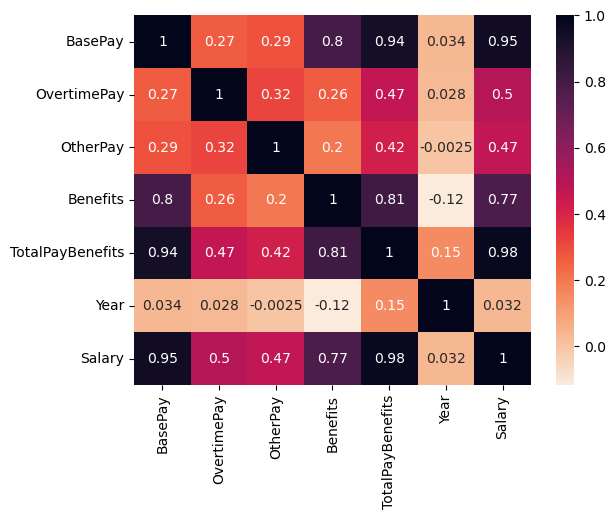

In [59]:
sns.heatmap(corr_df, annot= True, cmap='rocket_r')

Strong relationship between Salary and (BasePay, TotalPayBenefits, Benefits)

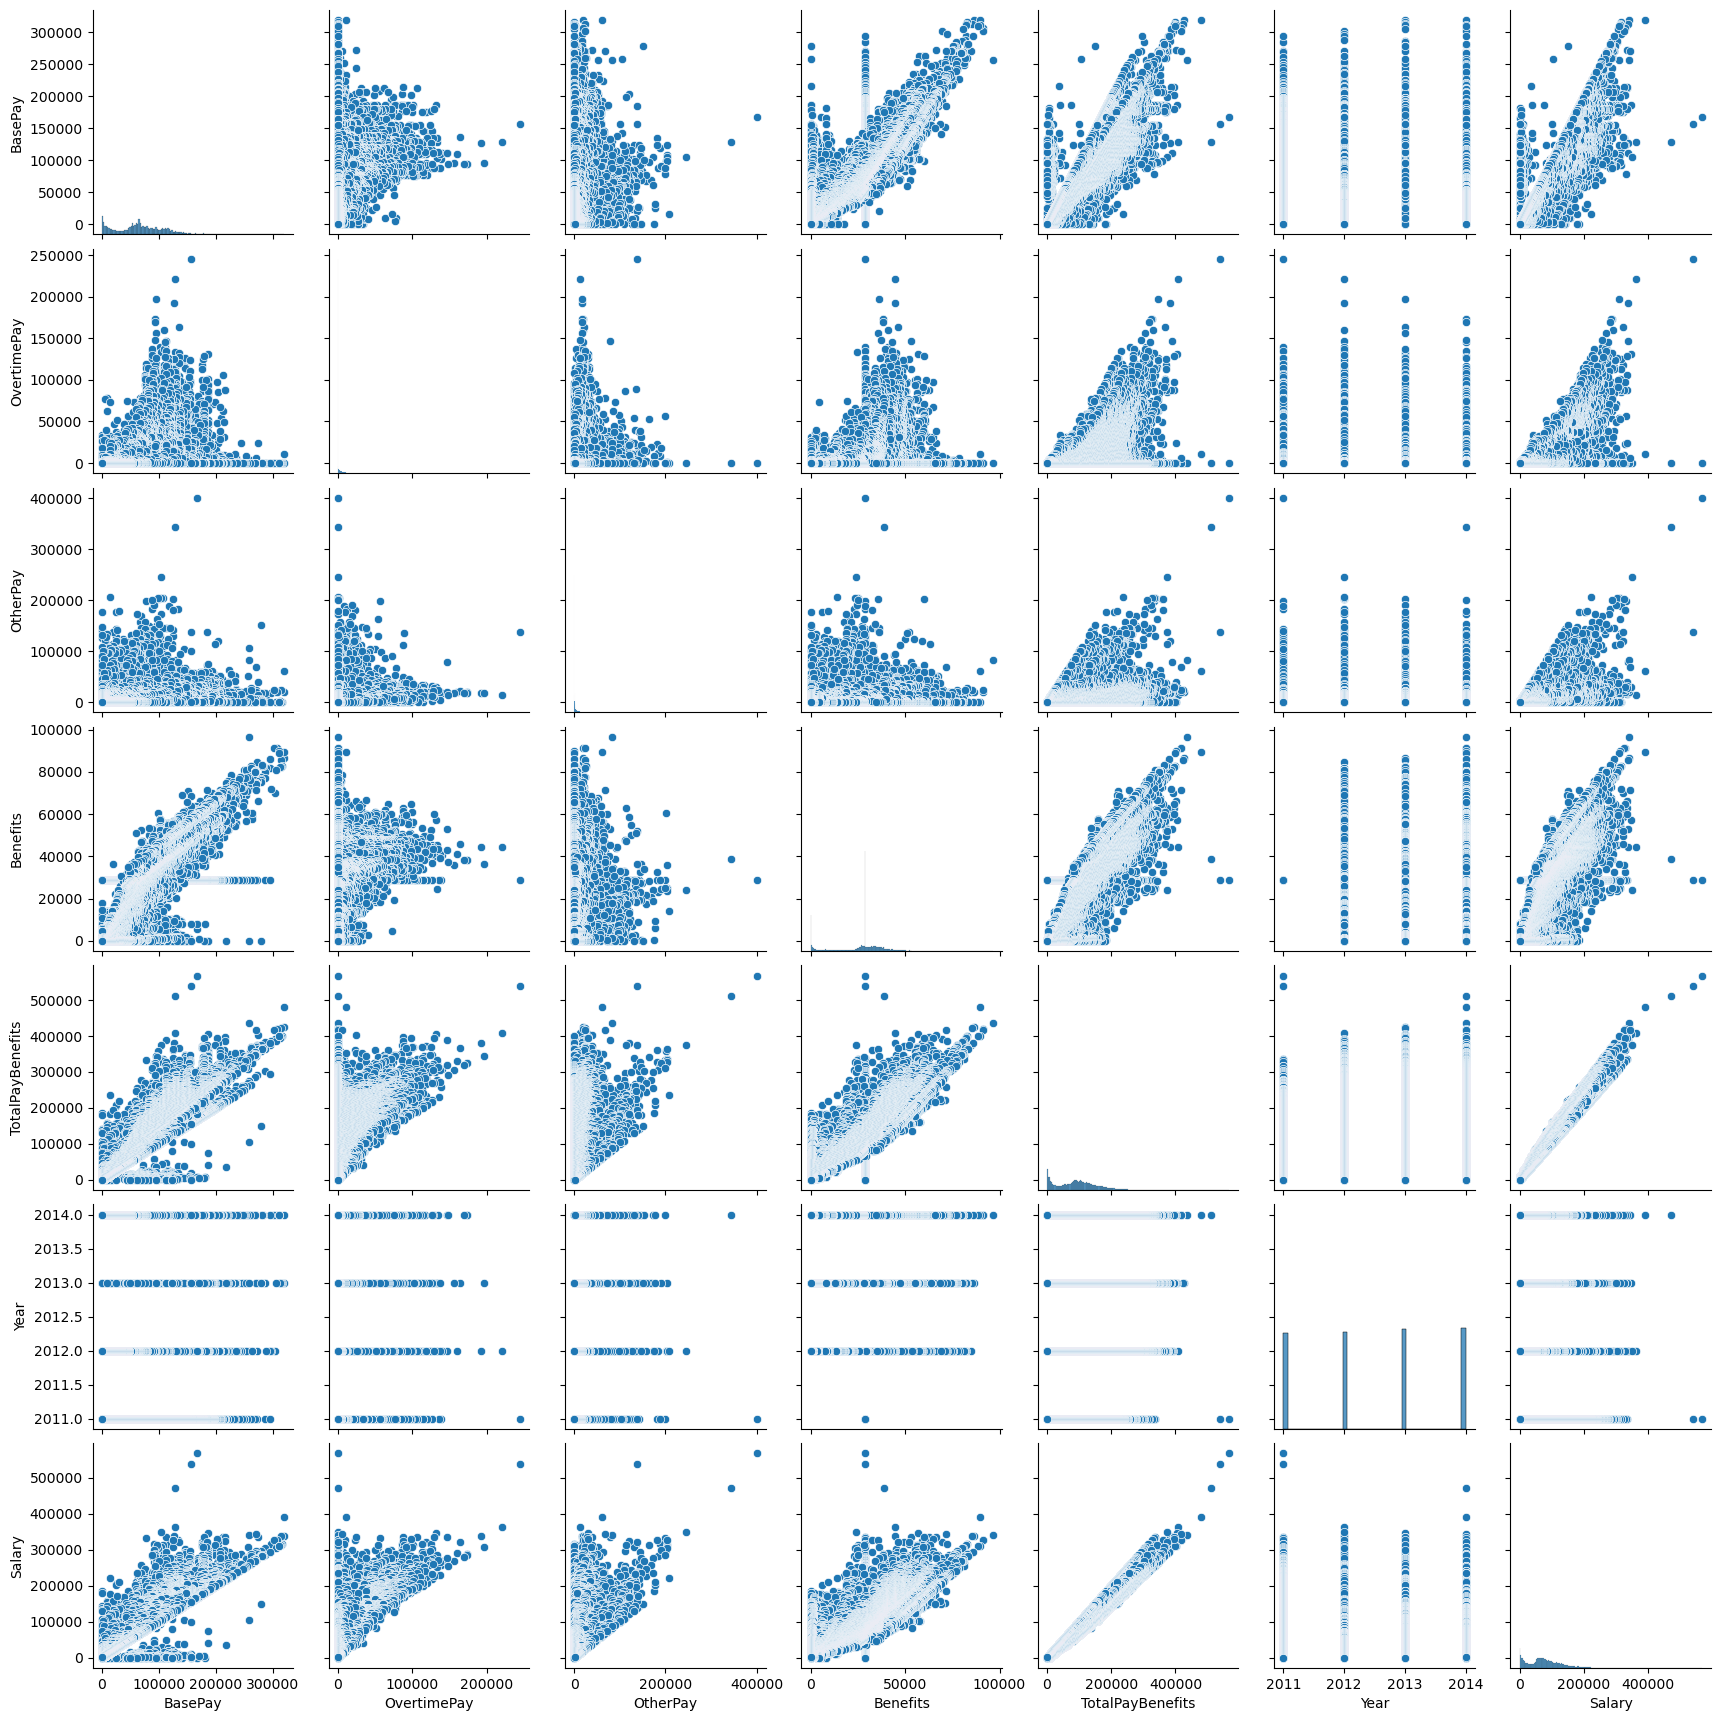

In [61]:
sns.pairplot(df)


## Summary of Insights
> Write a brief report summarizing the findings and insights from the analyses.

- The data is full of missing and zeros and needed to recollect to add more jobs records or to be more specific<br>
- There are Strong relationship between Salary and (BasePay, TotalPayBenefits, Benefits)<br>
- Some column was completely empty.
- there are some very high salary (outliers).

# Good Luck!